# Generate noise in time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.noise import LocalGaussianNoiseGenerator, GlobalGaussianNoiseGenerator
import matplotlib.patches as patches

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Import data (using sktime)

In [3]:
from sktime.datasets import load_airline

In [4]:
X = load_airline()
t = X.index.to_timestamp()

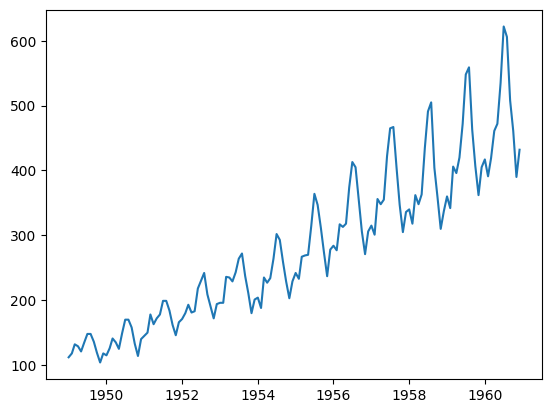

In [5]:
plt.plot(t, X.values)

## Adding Gaussian white noise on the full time series

In [6]:
generator = GlobalGaussianNoiseGenerator(noise_std=0.2, random_generator=rng)

In [7]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

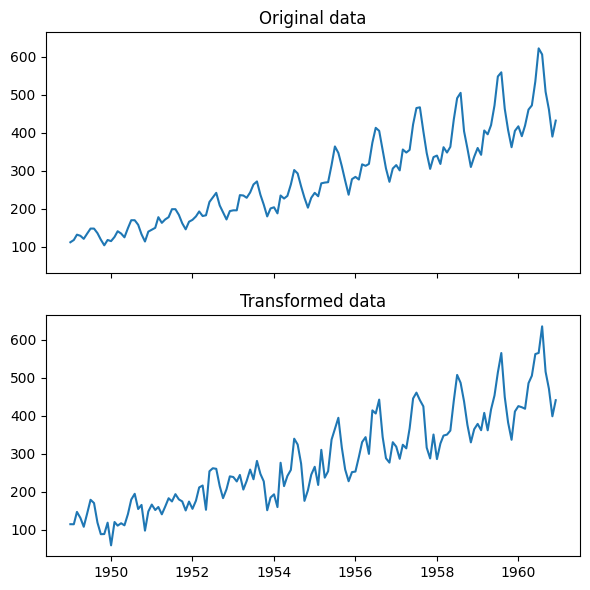

In [8]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
plt.tight_layout();

## Adding Gaussian white noise on randomly chosen subsequences

In [9]:
generator = LocalGaussianNoiseGenerator(n_patterns=5, patterns_width=5, noise_std=0.5, random_generator=rng)

In [10]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

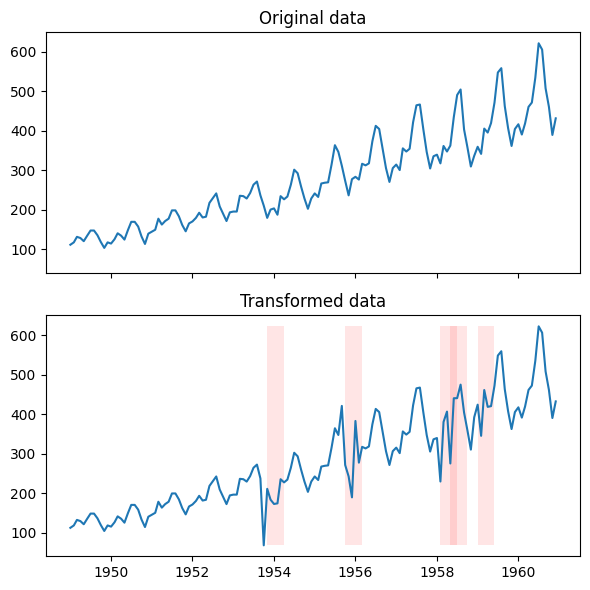

In [11]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for start, end in generator.patterns_indices_:
    width = end-start
    left = X.index[start]
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
plt.tight_layout();